In [2]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("/content/OCD Patient Dataset_ Demographics & Clinical Data.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


**Understanding** **Data** **And** **Cleaning**

In [4]:
df.shape

(1500, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [6]:
df.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [7]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


In [8]:
df.isna().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


In [9]:
df['Previous Diagnoses'].dtype
df['Medications'].dtype


dtype('O')

In [10]:
df['Previous Diagnoses'] = df['Previous Diagnoses'].fillna('Unknown')
df['Medications'] = df['Medications'].fillna('Unknown')


In [11]:
df.isna().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,0
Family History of OCD,0


In [12]:
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,Unknown,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,Unknown


In [13]:
df.duplicated().sum()

np.int64(0)

**EDA**

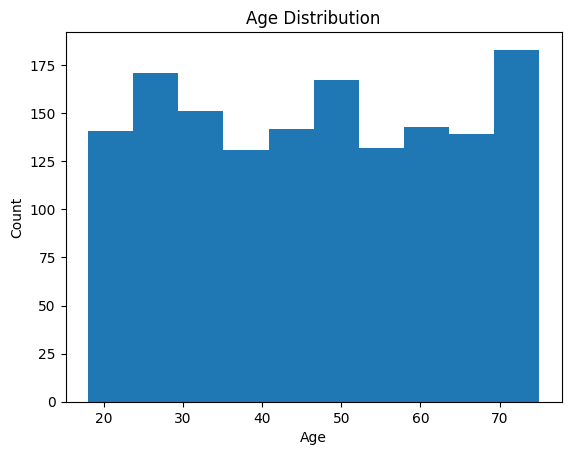

In [15]:
#Age Distribution
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


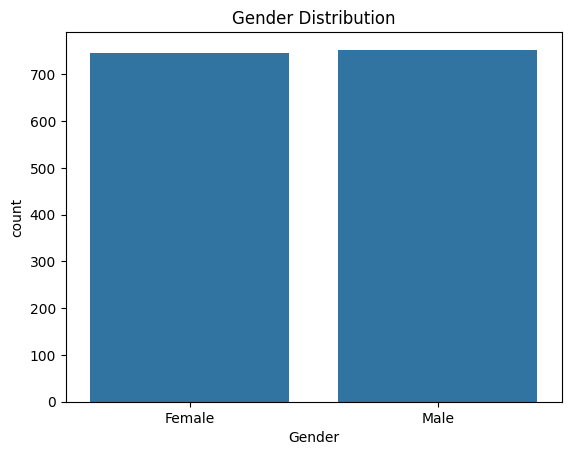

In [17]:
#Gender Count
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

**Skewness and Kurtosis**

**Right Skewed**

In [53]:
df['Age'].skew()

np.float64(0.005451711568436306)

**Left skewed**

In [54]:
df['Y-BOCS Score (Obsessions)'].skew()

np.float64(-0.0037306223394405645)

**Right Skewed**

In [55]:
df['Y-BOCS Score (Compulsions)'].skew()

np.float64(0.039490278015678684)

**Kurtosis is Light Tailed because kurtosis<0**

In [56]:
df['Age'].kurt()

np.float64(-1.2067102759458865)

In [57]:
df['Y-BOCS Score (Obsessions)'].kurt()

np.float64(-1.1960586670323001)

In [58]:
df['Y-BOCS Score (Compulsions)'].kurt()

np.float64(-1.186581770897702)

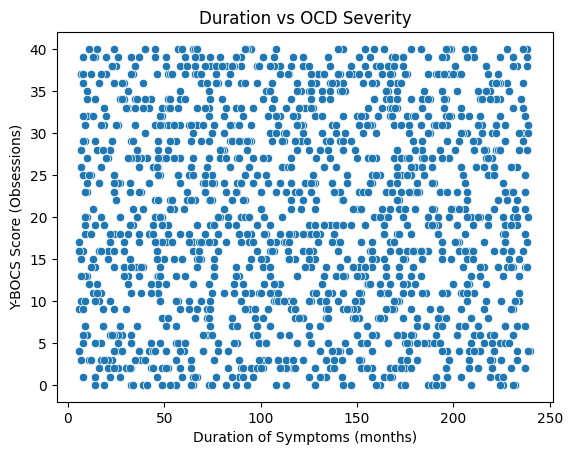

In [20]:
#OCD Severity vs Duration
sns.scatterplot(
    x='Duration of Symptoms (months)',
    y='Y-BOCS Score (Obsessions)',
    data=df
)
plt.title("Duration vs OCD Severity")
plt.show()

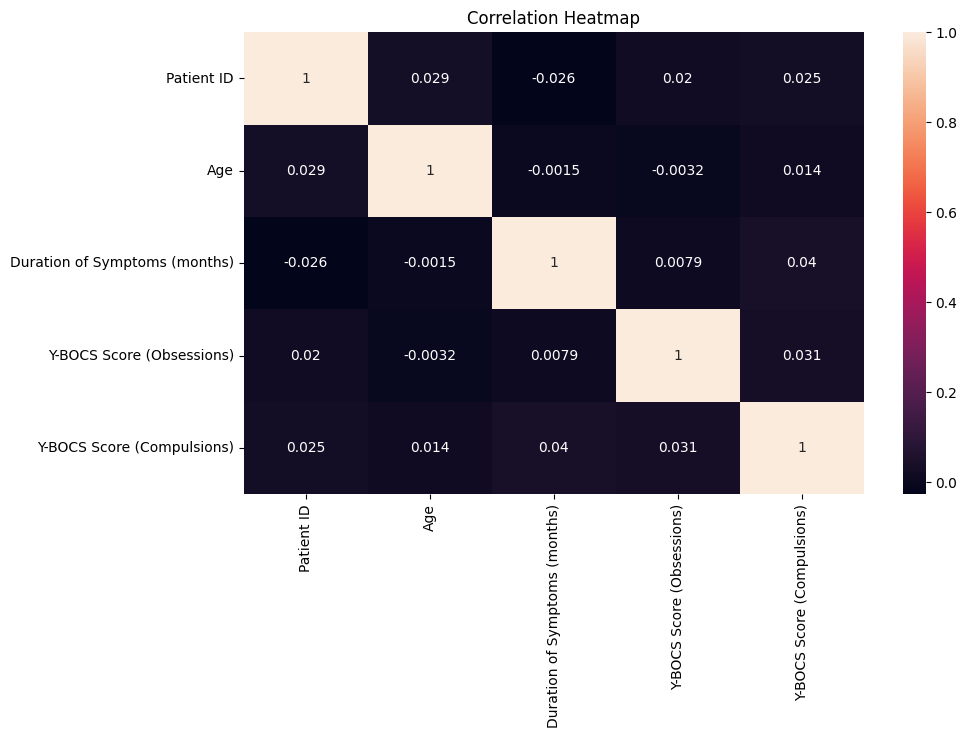

In [19]:
#Correlation Heatmap (Numeric Only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


**Feature Engineering**

In [21]:
Y = df['Depression Diagnosis']
X = df.drop(columns=[
    'Patient ID',
    'OCD Diagnosis Date',
    'Depression Diagnosis'
])

**Categorical Encoding**

In [24]:
le = LabelEncoder()
for col in X:
    X[col] = le.fit_transform(X[col])

**Feature Scaling**

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train-Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Machine Learning Models**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Logistic Regression**

In [30]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print(classification_report(Y_test, Y_pred_lr))


Logistic Regression Accuracy: 0.4688888888888889
              precision    recall  f1-score   support

          No       0.45      0.38      0.41       219
         Yes       0.48      0.55      0.52       231

    accuracy                           0.47       450
   macro avg       0.47      0.47      0.46       450
weighted avg       0.47      0.47      0.46       450



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Tree**

In [45]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

Y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print(classification_report(Y_test, Y_pred_dt))


Decision Tree Accuracy: 0.5222222222222223
              precision    recall  f1-score   support

          No       0.51      0.52      0.51       219
         Yes       0.54      0.53      0.53       231

    accuracy                           0.52       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.52      0.52      0.52       450



**Random Forest**

In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))


Random Forest Accuracy: 0.47333333333333333
              precision    recall  f1-score   support

          No       0.45      0.41      0.43       219
         Yes       0.49      0.53      0.51       231

    accuracy                           0.47       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.47      0.47      0.47       450



**Model Comparision**

In [49]:
models = {
    "Logistic Regression": accuracy_score(Y_test, Y_pred_lr),
    "Decision Tree": accuracy_score(Y_test, Y_pred_dt),
    "Random Forest": accuracy_score(Y_test, Y_pred_rf)
}

pd.DataFrame(models.items(), columns=['Model', 'Accuracy'])


,Model,Accuracy
0,Logistic Regression,0.468889
1,Decision Tree,0.522222
2,Random Forest,0.473333


**Confusion Matrix**

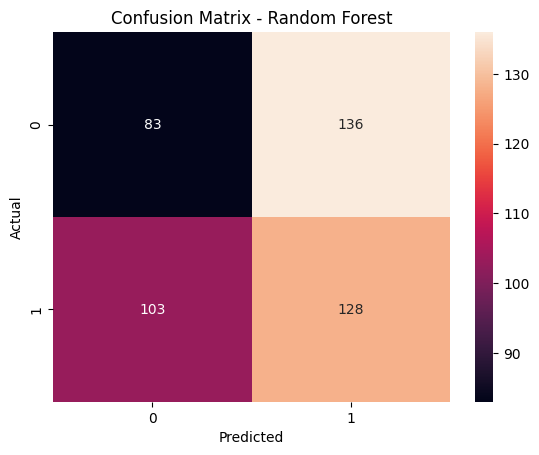

In [33]:
cm = confusion_matrix(Y_test, Y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Statistical Analysis**

In [39]:
print("Logistic Regression",accuracy_score(Y_test, Y_pred_lr))

Logistic Regression 0.4688888888888889


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test,Y_pred_lr))
print(classification_report(Y_test,Y_pred_lr))

Accuracy: 0.4688888888888889
              precision    recall  f1-score   support

          No       0.45      0.38      0.41       219
         Yes       0.48      0.55      0.52       231

    accuracy                           0.47       450
   macro avg       0.47      0.47      0.46       450
weighted avg       0.47      0.47      0.46       450



**Overall Accuracy: 46.9%**

The model correctly predicts about 47 out of 100 cases
This is low performance
Indicates the model is not learning strong patterns

**Class-wise Performance**
**Class: No (No Depression)**

Precision = 0.45

When the model predicts No, it is correct 45% of the time

Recall = 0.38

The model correctly identifies only 38% of actual No cases

F1-score = 0.41

**Poor balance between precision and recall**

Class: Yes (Depression)

Precision = 0.48

When the model predicts Yes, it is correct 48% of the time

Recall = 0.55

**The model correctly identifies 55% of actual Yes cases**
F1-score = 0.52

Slightly better than “No”, but still weak

Confirms overall weak classification ability